<a href="https://colab.research.google.com/github/leethanhvaan20302/desktop-tutorial/blob/main/EX8%3AInvented%20pendulum%20on%20a%20cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0bff35785e345ecf316c067747cd7f64e7df021fa5f6c57a9bc1a82265b7c787
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-3-7dc66299e144>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-7dc66299e144>:63: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
<ipython-input-3-7dc66299e144>:64: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )


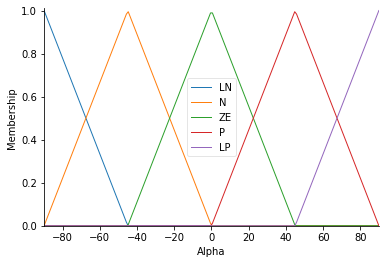

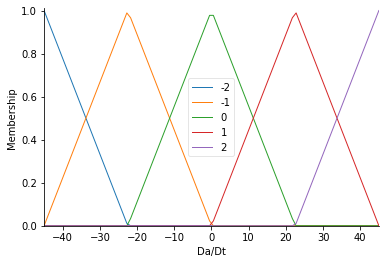

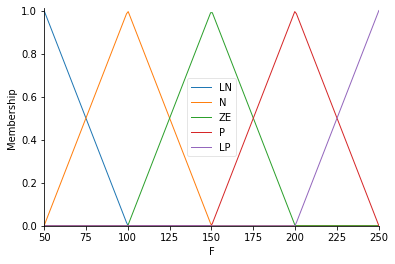

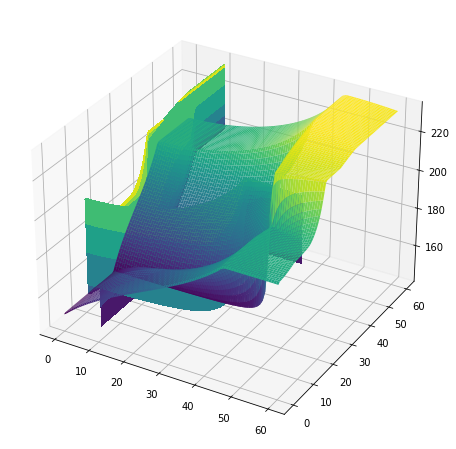

In [3]:
#Invented pendulum on a cart
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pi = math.pi
universe = np.linspace(-90,90,180)
universe1 = np.linspace(-45,45,90)
universe2 = np.linspace(50,250,200)
alpha = ctrl.Antecedent(universe, 'Alpha')
dalpha = ctrl.Antecedent(universe1, 'Da/Dt')
F = ctrl.Consequent(universe2,'F')
item1 = ['LN' , 'N', 'ZE', 'P', 'LP']
item2 = ['-2' , '-1', '0', '1', '2']
alpha.automf(names = item1)
dalpha.automf(names = item2)
F.automf(names = item1)
alpha.view()
dalpha.view()
F.view()
rule0 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['-2'])|
                  (alpha['N'] & dalpha['-2'])|(alpha['LN'] & dalpha['-1']),
                   consequent = F['LN'], label = 'Rule LN')
rule1 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['0'])|
                  (alpha['LN'] & dalpha['1'])|
                  (alpha['N'] & dalpha['-1'])|(alpha['N'] & dalpha['0'])
                  |(alpha['ZE'] & dalpha['-2'])|(alpha['ZE'] & dalpha['-1']),
                   consequent = F['N'], label = 'Rule N')
rule2 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['2'])|
                  (alpha['N'] & dalpha['1'])|
                  (alpha['N'] & dalpha['2'])|(alpha['ZE'] & dalpha['0'])
                  |(alpha['ZE'] & dalpha['1'])|(alpha['P'] & dalpha['-2'])
                  |(alpha['P'] & dalpha['-1'])|(alpha['LP'] & dalpha['-2'])
                  |(alpha['LP'] & dalpha['-1']),
                   consequent = F['ZE'], label = 'Rule ZE')
rule3 = ctrl.Rule(antecedent = (alpha['ZE'] & dalpha['2'])|
                  (alpha['P'] & dalpha['0'])|
                  (alpha['ZE'] & dalpha['2']),
                   consequent = F['P'], label = 'Rule P')
rule4 = ctrl.Rule(antecedent = (alpha['P'] & dalpha['2'])|
                  (alpha['LP'] & dalpha['1'])|
                  (alpha['LP'] & dalpha['2']),
                   consequent = F['LP'], label = 'Rule LP')
system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 91*91+1)
upsampled = np.linspace(0,60,91)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(91):
  for j in range(91):
    for k in range(91):
      sim.input['Alpha'] = x[i,j]
      sim.input['Da/Dt'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['F']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)